In [2]:
import os
import tifffile
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from natsort import natsorted

In [2]:
# Set the path to the directory containing the image stacks
stack_dir = 'D:/Temperature_images/RAW_2023-07-13/Stacks/'

# Get a list of all TIFF files in the input directory
files = [f for f in os.listdir(stack_dir) if f.endswith('.tiff')]
print(files)

green_stack = tifffile.imread(os.path.join(stack_dir, files[1]))
red_stack = tifffile.imread(os.path.join(stack_dir, files[2]))
blue_stack = tifffile.imread(os.path.join(stack_dir, files[0]))

#Get length of image stacks
num_images_green = len(green_stack)
num_images_red = len(red_stack)
num_images_blue =len(blue_stack)
if num_images_green == num_images_red and num_images_blue:
    print("Equal stacks")
    num_images = num_images_green
else:
    print("unequal stacks")

print("stack=",num_images)

['stacked_blue_channel.tiff', 'stacked_green_channel.tiff', 'stacked_red_channel.tiff']
Equal stacks
stack= 68


In [32]:
#FOR OXYGEN CALIBRATION:Loop through all red/green pairs of images in the stacks an get the RED/GREEN intensity ratio
mean_red_intensity =[]
mean_green_intensity = []
mean_blue_intensity = []
red_green_ratio = []

for i in range(num_images):

    mean_red_intensity.append(np.mean(red_stack[i]))
    mean_green_intensity.append(np.mean(green_stack[i]))
    mean_blue_intensity.append(np.mean(blue_stack[i]))

    # Calculate the intensity ratio between the two images
    ratio = red_stack[i] / green_stack[i]
    red_green_ratio.append(ratio)


In [3]:
#FOR TEMPERATURE CALIBRATION: Loop through all red/blue pairs of images in the stacks an get the RED/BLUE intensity ratio
mean_red_intensity =[]
mean_green_intensity = []
mean_blue_intensity = []
std_red_intensity = []
std_green_intensity = []
std_blue_intensity =[]
red_blue_ratio = []
mean_red_blue_ratio =[]
red_blue_std = []

for i in range(num_images):

    mean_red_intensity.append(np.mean(red_stack[i]))
    mean_green_intensity.append(np.mean(green_stack[i]))
    mean_blue_intensity.append(np.mean(blue_stack[i]))
    std_red_intensity.append(np.std(red_stack[i]))
    std_green_intensity.append(np.std(green_stack[i]))
    std_blue_intensity.append(np.std(blue_stack[i]))

    # Calculate the intensity ratio between the two images
    ratio = red_stack[i] / blue_stack[i]
    mean_red_blue_ratio.append(np.mean(ratio))
    red_blue_ratio.append(ratio)
    red_blue_std.append(np.std(ratio))


In [ ]:
# Define number of sections for each image to calculate mean ratios
num_sections = 3

# Calculate the height of each section
section_height = red_stack.shape[1] // num_sections

# Loop over eack image in the ratio stack and divide it into sections
ratio_section_means = []
ratio_sections = []

# CHANGE DEPENDING ON CALIBRATION
for image in red_blue_ratio:
    sections = [image[i*section_height:(i+1)*section_height, :] for i in range(num_sections)]
    ratio_sections.append(sections)

    # Calculate the mean ratio of eacjh section and append it to the list
    ratio_section_mean = [np.nanmean(section) for section in sections]
    ratio_section_means.append(ratio_section_mean)

# Reshape array of mean ratios to 
ratio_section_means = np.reshape(ratio_section_means, (-1, num_sections))
print(ratio_section_means)

In [ ]:
# Define the image index to show
image_idx = 0

# Get an example image from the green stack and its sections to see how its divided
image = red_stack[image_idx]
sections = ratio_sections[image_idx]

for section_idx in range(num_sections):
    section = sections[section_idx]
    plt.imshow(section, cmap="gray")
    plt.title(f'Image {image_idx}, Section {section_idx}')
    plt.show()


In [6]:
# Calculate the mean of means for each image and the standard deviation
ratio_mean_of_means = []
ratio_std_of_means =[]

for i in range(len(ratio_section_means)):
    mean_ratio = np.nanmean(ratio_section_means[i])
    std_ratio = np.nanstd(ratio_section_means[i])
    ratio_mean_of_means.append(mean_ratio)
    ratio_std_of_means.append(std_ratio)

print(ratio_mean_of_means)
print(ratio_std_of_means)

[4.028665986981349, 3.9859099034376353, 3.9002686110672697, 3.9379336187699345, 3.9011572433090933, 3.9248123265792043, 3.910938102199239, 3.903196176638335, 3.899972723247371, 3.8989882413480452, 3.8981763717012528, 3.8970097355889872, 3.892966601290251, 3.885647829362544, 3.87317051854143, 3.8503690899471237, 3.8291186708206886, 3.803890186816645, 3.7809752541728883, 3.7544037769365093, 3.732482044548807, 3.7081940033517267, 3.683711532457851, 3.6616694774892067, 3.6371818949157557, 3.615761379883601, 3.5912766206719127, 3.57040052468118, 3.5472921691120387, 3.5265267596630037, 3.5062042482341145, 3.486134000054244, 3.4701019483658677, 3.453003722702872, 3.4415194392321986, 3.4265418639342737, 3.4106720358419484, 3.3954977893517166, 3.382719114363925, 3.371230671687938, 3.3593829574988168, 3.3498139219615495, 3.3386241895655857, 3.3305438099377347, 3.319784121947617, 3.312628622872417, 3.3035004673048274, 3.296007428500777, 3.288102091187335, 3.2797125109623444, 3.2736989075313816, 3

In [ ]:
# Set the path to the directory containing the image filenames
files_dir = 'D:/Temperature_images/RAW_2023-07-13/'
files = [f for f in os.listdir(files_dir) if f.endswith('.tiff')]

# Sort filenames to match with stack index
files = natsorted(files)

# Initialize an empty dataframe
df_ratios = pd.DataFrame(columns=['Temperature/O2', 'Intensity Ratio', 'Intensity Red', 'Intensity Green', 'Intensity Blue', 'Std Ratio','Std Red','Std Green', 'Std Blue'])

# Add filenames and corresponding red/green ratio to the dataframe
for i in range(num_images):
    ratio_df = ratio_mean_of_means[i]
    std_df = ratio_std_of_means[i]
    blue_intensity = mean_blue_intensity[i]
    green_intensity = mean_green_intensity[i]
    red_intensity = mean_red_intensity[i]
    blue_std = std_blue_intensity[i]
    green_std = std_green_intensity[i]
    red_std = std_red_intensity[i]
    filename = os.path.splitext(files[i])[0][15:]
    numeric_num = float(filename.replace(",", ".")) 
    df_ratios.loc[i] = [numeric_num, ratio_df, red_intensity, green_intensity, blue_intensity, std_df, red_std, green_std, blue_std]

#df_ratios['Intensity Ratio'] = df_ratios['Intensity Ratio'].round(4)

# Print the dataframe
print(df_ratios)

In [58]:
#Save the DataFrame as a CSV file
df_ratios.to_csv('D:/Temperature_images/RAW_2023-07-13/red_blue_ratio.csv',header=True, index=False)

In [9]:
df_ratios = pd.read_csv('D:/Temperature_images/RAW_2023-07-13/red_blue_ratio.csv')
print(df_ratios)

    Temperature/O2  Intensity Ratio  Intensity Red  Intensity Green  \
0             3.66         4.028666    2000.542397      2414.303438   
1             4.66         3.985910    1970.106715      2389.289862   
2             5.34         3.900269    1906.914360      2337.299266   
3             5.56         3.937934    1935.711142      2361.532844   
4             5.73         3.901157    1907.993320      2338.021853   
..             ...              ...            ...              ...   
63           19.37         3.197977    1414.081426      1875.326721   
64           19.62         3.184202    1405.190848      1866.782416   
65           19.75         3.177719    1401.063633      1863.000727   
66           19.86         3.170922    1396.879673      1859.114836   
67           19.99         3.163881    1392.319316      1854.648079   

    Intensity Blue  Std Ratio     Std Red   Std Green   Std Blue  
0       495.451335   0.201711  210.530828  228.200016  28.340946  
1       493.1

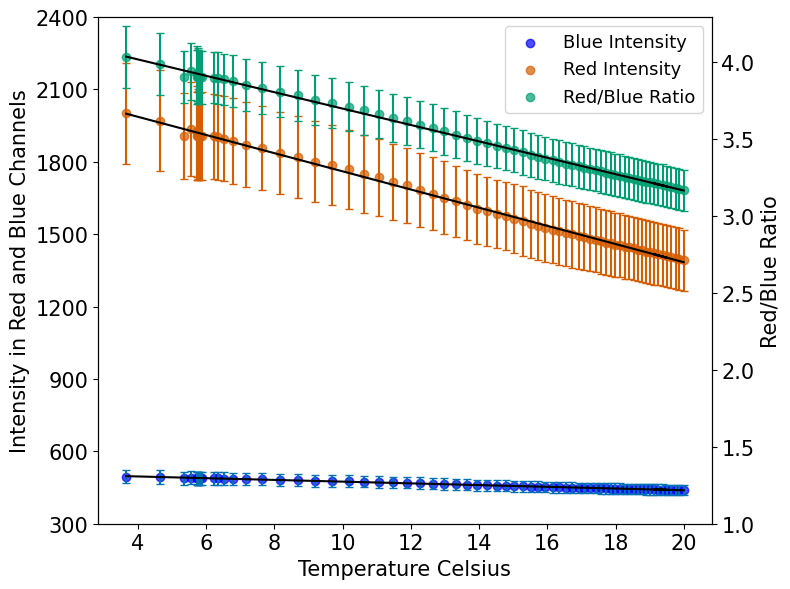

In [53]:
# Create the figure and axes
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot blue and red intensity as scatter points with trendlines
blue_fit = np.polyfit(df_ratios['Temperature/O2'], df_ratios['Intensity Blue'], 1)
red_fit = np.polyfit(df_ratios['Temperature/O2'], df_ratios['Intensity Red'], 1)

ax1.scatter(df_ratios['Temperature/O2'], df_ratios['Intensity Blue'], color='blue', label='Blue Intensity', alpha=0.7)
ax1.errorbar(df_ratios['Temperature/O2'], df_ratios['Intensity Blue'], yerr=df_ratios['Std Blue'], color='#0072B2', fmt='none', capsize=3)
ax1.plot(df_ratios['Temperature/O2'], np.polyval(blue_fit, df_ratios['Temperature/O2']), color='black')

ax1.scatter(df_ratios['Temperature/O2'], df_ratios['Intensity Red'], color='#D55E00', label='Red Intensity', alpha=0.7)
ax1.errorbar(df_ratios['Temperature/O2'], df_ratios['Intensity Red'], yerr=df_ratios['Std Red'], color='#D55E00', fmt='none', capsize=3)
ax1.plot(df_ratios['Temperature/O2'], np.polyval(red_fit, df_ratios['Temperature/O2']), color='Black')

ax1.set_xlabel('Temperature Celsius', fontsize=15)
ax1.set_ylabel('Intensity in Red and Blue Channels', fontsize=15)
ax1.tick_params(axis='both', labelsize=15)
ax1.set_yticks(np.arange(300, 2500, 300))

# Create a secondary y-axis for intensity ratio
ax2 = ax1.twinx()
ratio_fit = np.polyfit(df_ratios['Temperature/O2'], df_ratios['Intensity Ratio'], 1)
ax2.scatter(df_ratios['Temperature/O2'], df_ratios['Intensity Ratio'], color='#009E73', label='Red/Blue Ratio', alpha=0.7)
ax2.errorbar(df_ratios['Temperature/O2'], df_ratios['Intensity Ratio'], yerr=df_ratios['Std Ratio'], color='#009E73', fmt='none', capsize=3)
ax2.plot(df_ratios['Temperature/O2'], np.polyval(ratio_fit, df_ratios['Temperature/O2']), color='black')
ax2.set_ylabel('Red/Blue Ratio', fontsize=15)
ax2.tick_params(axis='y', labelsize=15)
ax2.set_yticks(np.arange(1, 4.5, 0.5))


# Combine the legends for both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper right', fontsize=13)



# Adjust spacing
fig.tight_layout()



# Show the plot
plt.show()

In [10]:
import scipy.interpolate

# Get the data points for the ratio plot
x_data = df_ratios['Tempeartue/O2'].values
y_data = df_ratios['Intensity Ratio'].values

# Interpolate the data points to extend to 0 to 40 degrees Celsius
f = scipy.interpolate.interp1d(x_data, y_data, kind='linear', fill_value='extrapolate')

# Get the interpolated values for 0 and 40 degrees Celsius
x_new = np.array([0, 40])
y_new = f(x_new)

print(y_new)


[4.18515325 2.08014169]
